In [1]:
from utils.getter import *
import torch.utils.data as data
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from datasets.dataset import *
import augmentations.transforms as TF
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
tf = TF.Compose([
    TF.Resize(size = (512,512)),
    TF.RandomHorizontalFlip(0.5),
    TF.RandomShear(0.2),
    TF.Rotation(),
    TF.ToTensor(),
    TF.Cutout(0.02),
    TF.Normalize(box_transform=False)
])

In [3]:
trainset = CocoDataset(
        root_dir = os.path.join('datasets/aic-hcmc2020/aic-hcmc/new_images'),
        ann_path = os.path.join('datasets/aic-hcmc2020/aic-hcmc/new_annotations/instances.json'),
        transforms=tf)

loading annotations into memory...
Done (t=1.02s)
creating index...
index created!


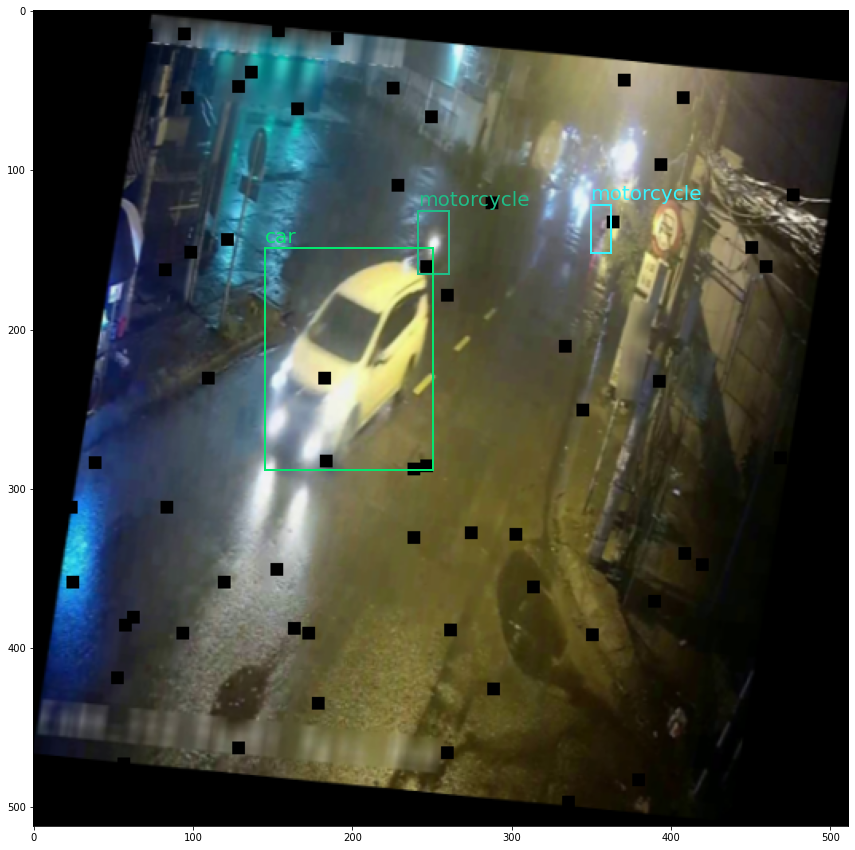

In [21]:
%matplotlib inline
trainset.visualize_item()

In [ ]:
item = trainset[0]
img = item['img']
box = item['box']
label = item['label']
print(box.shape)
print(label.shape)

In [ ]:
labels

In [ ]:
trainloader = data.DataLoader(trainset, batch_size=1, collate_fn=trainset.collate_fn)

In [ ]:
for batch in trainloader:
    imgs = batch['imgs'].cuda()
    labels = batch['labels'].cuda()
    print(imgs.shape)
    print(labels.shape)
    break

In [ ]:
net = EfficientDetBackbone(num_classes=4, compound_coef=2,
                        ratios=[(1.0, 1.0), (1.4, 0.7), (0.7, 1.4)],
                        scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])
net = net.cuda()
criterion = FocalLoss()    

In [ ]:
_, regression, classification, anchors = net(imgs)

In [ ]:
loss = criterion(classification, regression, anchors, labels)
print(loss)

In [ ]:
%matplotlib inline
trainset.visualize_item()

In [ ]:
for i in trainset.coco.anns:
    print(trainset.coco.anns[i]['category_id'])
    break

In [ ]:
trainset.coco.anns

In [ ]:
trainset.plot()